In [5]:
import pandas as pd
import numpy as np

# Results

In [3]:
result_example = 'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Staphylococcus_aureus/Results/model_gset_1_0/all/f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

experiments = pd.MultiIndex.from_product([['Length_1', 'Length_2', 'Length_3', 'Length_4'], [0, 1, 2, 3, 4]])

results = pd.DataFrame(index = antibiotics, columns = experiments)

In [6]:
for i in [1, 2, 3, 4]: #path length
    for j in [0, 1, 2, 3, 4]: #replicate
        result_file = f'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Staphylococcus_aureus/Results/model_gset_{i}_{j}/all/f1.tab'
        with open(result_file, 'r') as result:
            for line in result:
                values = line.split('\t')
                results.loc[values[0]][f'Length_{i}'][j] = np.around(float(values[1]), decimals = 3)

In [7]:
mean_results = pd.DataFrame(index = antibiotics, columns = ['Length_1', 'Length_2', 'Length_3', 'Length_4'])

for i in [1, 2, 3, 4]: #path length
    mean_results[f'Length_{i}'] = results.loc[antibiotics][f'Length_{i}'].mean(axis = 1)

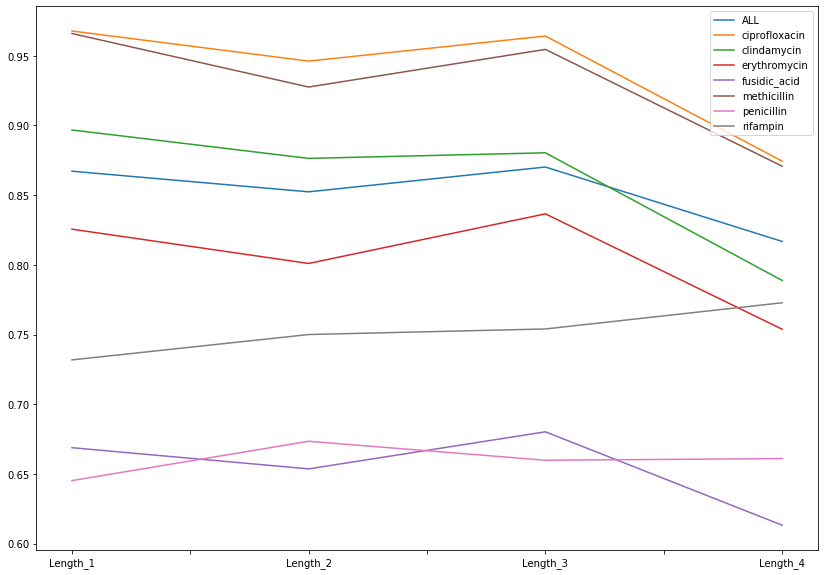

In [8]:
mean_results.T.plot(figsize = (14,10)).legend(loc='upper right')

In [9]:
mean_results

,Length_1,Length_2,Length_3,Length_4
ALL,0.8672,0.8524,0.8702,0.8168
ciprofloxacin,0.9678,0.9462,0.9642,0.8744
clindamycin,0.8968,0.8764,0.8804,0.7888
erythromycin,0.8256,0.8010,0.8366,0.7538
fusidic_acid,0.6688,0.6536,0.6802,0.6132
methicillin,0.9660,0.9276,0.9546,0.8708
penicillin,0.6452,0.6734,0.6598,0.6610
rifampin,0.7318,0.7500,0.7540,0.7728


In [10]:
# results_virulence = pd.DataFrame(index = antibiotics, columns = ['F1_score'])


# result_file = 'E:/User/bruna.fistarol/Documents/GitHub/Mestrado-EMAp/Staphylococcus_aureus/Results/model_gset_virulence/all/f1.tab'
# with open(result_file, 'r') as result:
#     for line in result:
#         values = line.split('\t')
#         results_virulence.loc[values[0]] = np.around(float(values[1]), decimals = 3)